In [1]:
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt
import os
import seaborn as sns


import mplscience

mplscience.available_styles()
mplscience.set_style(reset_current=True)
plt.rcParams['legend.scatterpoints'] = 1 

['default', 'despine']


In [2]:
color_dict = { 'Prlf. Ductal': '#f7b6d2', 'Ductal': '#d62728', 'Imm. Acinar': '#ffeb3b', 'Mat. Acinar': '#98df8a',
    'Alpha': '#1f77b4', 'Beta': '#ff7f0e', 'Delta': '#279e68', 'Eps. progenitors': '#aa40fc', 'Epsilon': '#8c564b',
       'Fev+': '#e377c2', 'Fev+ Alpha': '#b5bd61', 'Fev+ Beta': '#aec7e8', 'Fev+ Delta': '#aec7e8', 'Fev+ Delta,0': '#ffbb78', 'Fev+ Delta,1':'#98df8a',
        'Fev+ Delta,2': '#17becf', 'Ngn3 high cycling': '#aec7e8',
        'Ngn3 high,0': '#ff9896', 'Ngn3 high': '#ff9896', 'Ngn3 high,1':'#f0b98d', 'Ngn3 low': '#c5b0d5'
}

In [3]:
sc.logging.print_header()

scanpy==1.9.1 anndata==0.8.0 umap==0.5.3 numpy==1.22.4 scipy==1.9.1 pandas==1.5.1 scikit-learn==1.1.2 statsmodels==0.13.2 python-igraph==0.9.11 pynndescent==0.5.7


In [4]:
output_dir = "."

In [5]:
adata = sc.read_h5ad("/lustre/groups/ml01/workspace/moscot_paper/pancreas/pancreas_multiome_2022_processed.h5ad")

In [6]:
adata.uns["celltype_colors"] = [color_dict[ct] for ct in adata.obs["celltype"].cat.categories]

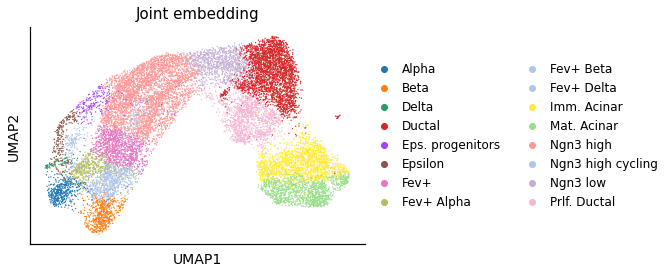

In [7]:
fig = sc.pl.embedding(adata, basis="umap", color=["celltype"], title="Joint embedding", show=False)

In [8]:
fig.figure.savefig(os.path.join(output_dir, 'umap_joint.png'))

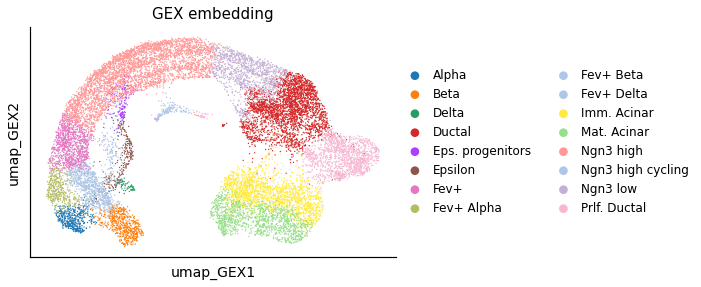

In [9]:
fig = sc.pl.scatter(adata, basis="umap_GEX", color=["celltype"], title="GEX embedding", show=False)

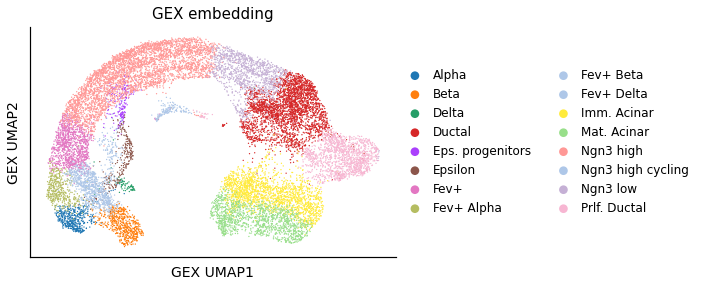

In [10]:
fig.set_xlabel("GEX UMAP1")
fig.set_ylabel("GEX UMAP2")
fig.figure

In [11]:
fig.figure.savefig(os.path.join(output_dir, 'umap_gex.png'))

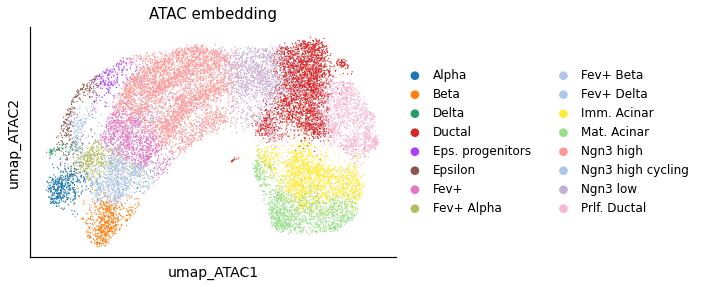

In [12]:
fig = sc.pl.scatter(adata, basis="umap_ATAC", color=["celltype"], title="ATAC embedding", show=False)

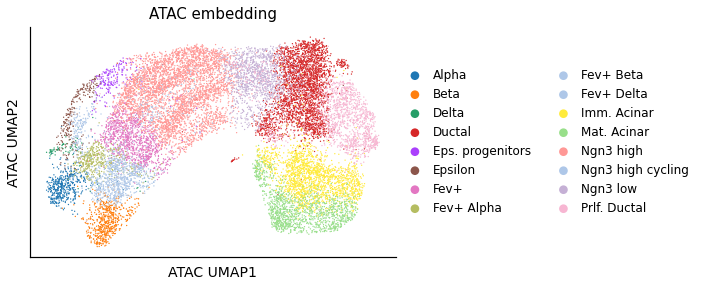

In [13]:
fig.set_xlabel("ATAC UMAP1")
fig.set_ylabel("ATAC UMAP2")
fig.figure

In [14]:
fig.figure.savefig(os.path.join(output_dir, 'umap_atac.png'))

In [15]:
label_params = fig.get_legend_handles_labels() 

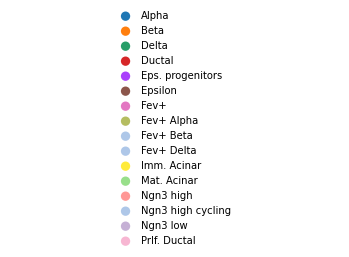

In [16]:
figl, axl = plt.subplots()
axl.axis(False)
axl.legend(*label_params, fontsize=5, loc="center", markerscale=7, bbox_to_anchor=(0.5, 0.5), prop={"size":10})


In [17]:
axl.figure.savefig(os.path.join(output_dir, 'legend_only.png'))

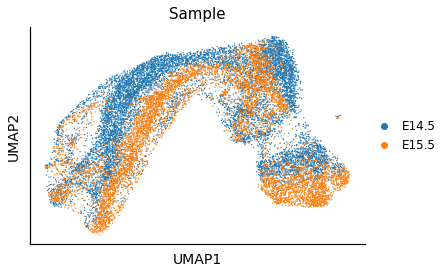

In [18]:
fig = sc.pl.umap(adata, color=["sample"], title="Sample", show=False)

In [19]:
fig.figure.savefig(os.path.join(output_dir, 'umap_sample.png'))

In [20]:
x,y = 'sample', 'celltype'
df = adata.obs.copy()
df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

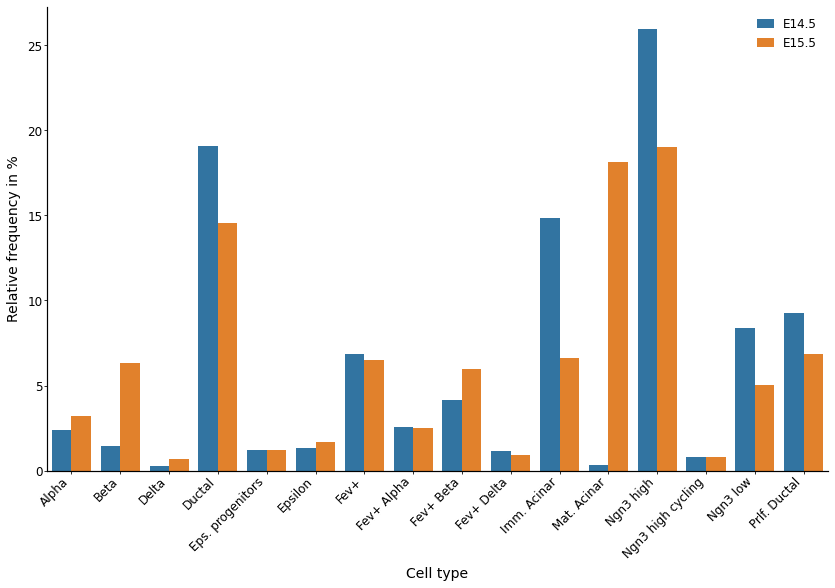

In [21]:
g = sns.catplot(x="celltype",y='percent',hue=x,kind='bar',data=df1, legend=False,height=8.27, aspect=11.7/8.27)
plt.xlabel("Cell type")
plt.ylabel("Relative frequency in %")
plt.xticks(rotation=45, ha='right')
plt.legend(loc='upper right')
plt.tight_layout()

In [22]:
fig = g.fig

In [23]:
fig.figure.savefig(os.path.join(output_dir, 'celltype_sample_distribution.png'))

In [24]:
x,y = 'sample', 'celltype'
df2 = adata[~adata.obs["celltype"].isin(["Mat. Acinar", "Imm. Acinar", "Ductal", "Prlf. Ductal"])].obs.copy()
df3 = df2.groupby(x)[y].value_counts(normalize=True)
df3 = df3.mul(100)
df3 = df3.rename('percent').reset_index()

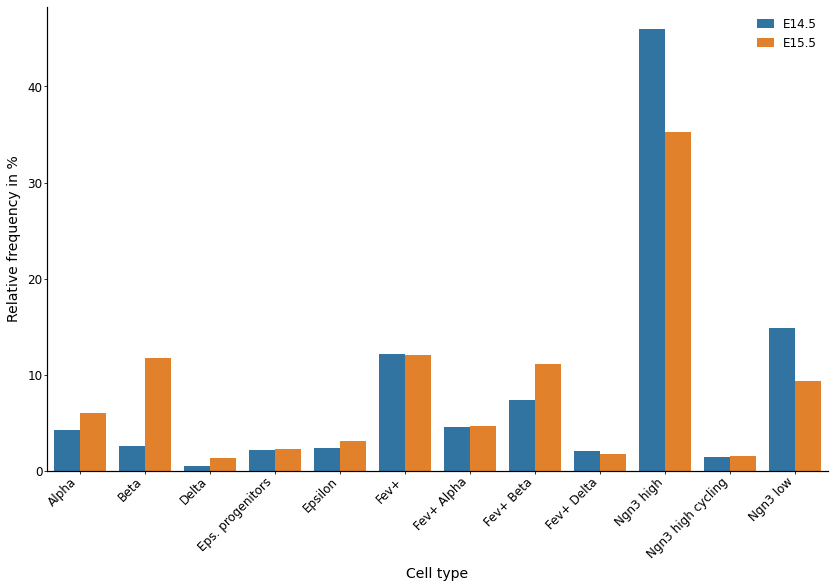

In [25]:
g = sns.catplot(x="celltype",y='percent',hue=x,kind='bar',data=df3, legend=False,height=8.27, aspect=11.7/8.27)
plt.xlabel("Cell type")
plt.ylabel("Relative frequency in %")
plt.xticks(rotation=45, ha='right')
plt.legend(loc='upper right')
plt.tight_layout()

In [26]:
fig = g.fig

In [27]:
fig.figure.savefig(os.path.join(output_dir, 'celltype_sample_distribution_reduced.png'))